In [1]:
import pandas as pd
import numpy as np
import astropy
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('books.csv')

In [3]:
df.head()

,Title,Author,Genre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin


In [4]:
print(df.shape)

(211, 5)


In [ ]:
df = pd.DataFrame(list(df))

In [ ]:
print("Dataset Information:")
print(df.info())

In [5]:
print("First Few Rows of the Dataset:")
print(df.head())

First Few Rows of the Dataset:
                      Title            Author              Genre  Height  \
0  Fundamentals of Wavelets  Goswami, Jaideva  signal_processing     228   
1                Data Smart     Foreman, John       data_science     235   
2  God Created the Integers  Hawking, Stephen        mathematics     197   
3         Superfreakonomics   Dubner, Stephen          economics     179   
4               Orientalism      Said, Edward            history     197   

       Publisher  
0          Wiley  
1          Wiley  
2        Penguin  
3  HarperCollins  
4        Penguin  


In [7]:
df.dtypes

Title        object
Author       object
Genre        object
Height        int64
Publisher    object
dtype: object

In [8]:
df.describe()

,Height
count,211.000000
mean,206.056872
std,26.828141
min,160.000000
25%,180.000000
50%,199.000000
75%,229.500000
max,283.000000


In [16]:
df.nunique

<bound method DataFrame.nunique of                             Title              Author              Genre  \
0        Fundamentals of Wavelets    Goswami, Jaideva  signal_processing   
1                      Data Smart       Foreman, John       data_science   
2        God Created the Integers    Hawking, Stephen        mathematics   
3               Superfreakonomics     Dubner, Stephen          economics   
4                     Orientalism        Said, Edward            history   
..                            ...                 ...                ...   
206      Structure and Randomness        Tao, Terence        mathematics   
207  Image Processing with MATLAB       Eddins, Steve  signal_processing   
208                   Animal Farm      Orwell, George            fiction   
209                    Idiot, The  Dostoevsky, Fyodor            fiction   
210            Christmas Carol, A    Dickens, Charles            fiction   

     Height      Publisher  
0       228          Wi

In [17]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Title         0
Author       24
Genre         0
Height        0
Publisher    96
dtype: int64


In [18]:
df.duplicated().sum()

0

In [19]:
df.dtypes

Title        object
Author       object
Genre        object
Height        int64
Publisher    object
dtype: object

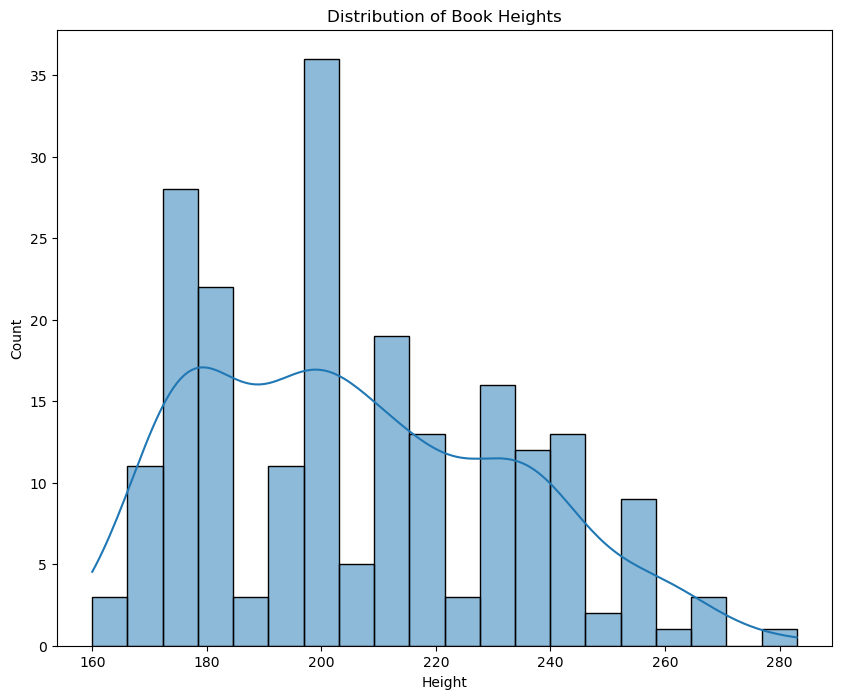

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(df['Height'], bins=20, kde=True)
plt.title('Distribution of Book Heights')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

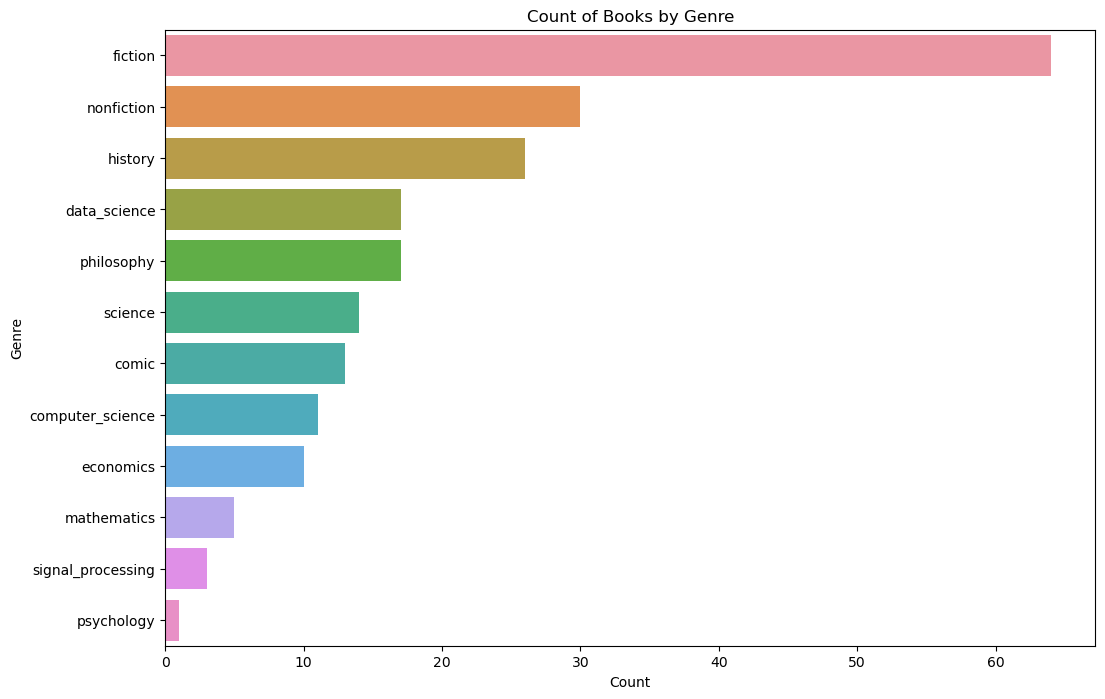

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Count of Books by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

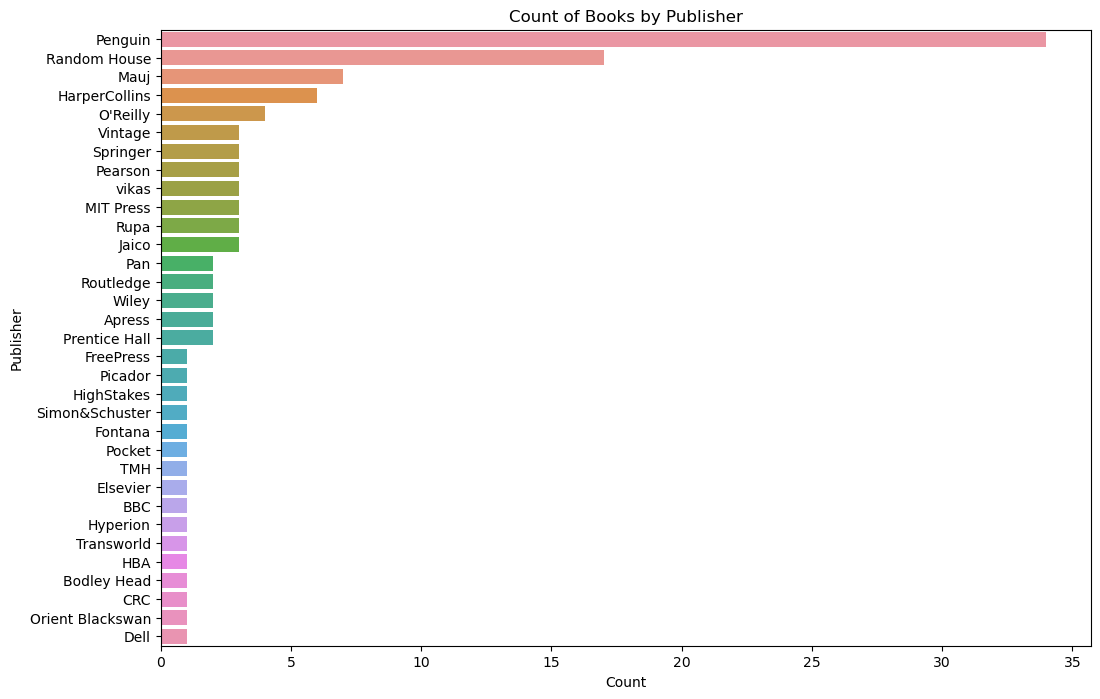

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Publisher', data=df, order=df['Publisher'].value_counts().index)
plt.title('Count of Books by Publisher')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.show()

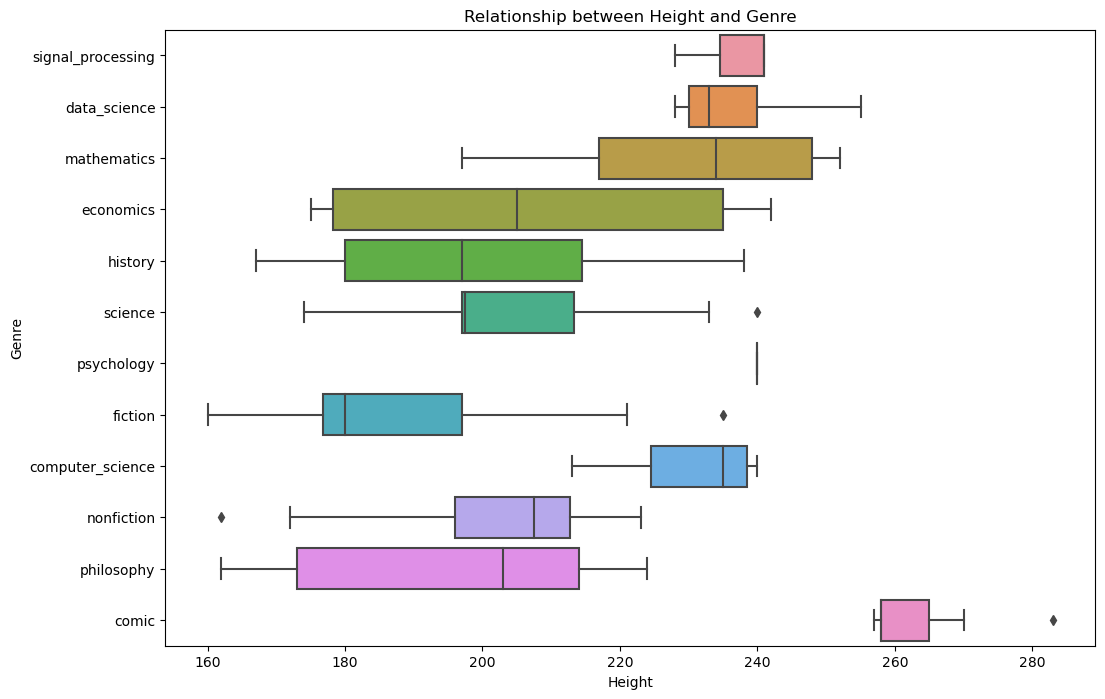

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Height', y='Genre', data=df)
plt.title('Relationship between Height and Genre')
plt.xlabel('Height')
plt.ylabel('Genre')
plt.show()

C:\Users\Suraj\AppData\Local\Temp\ipykernel_11936\3243188761.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


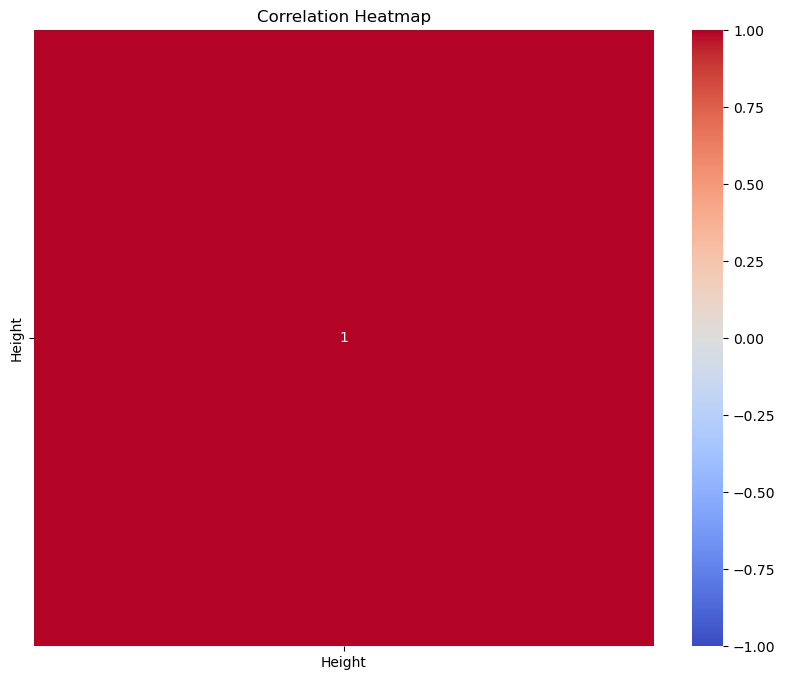

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
def preprocess_data(df):
    # Fill missing values
    df.fillna('', inplace=True)

    # Combine text features
    df['combined_features'] = df['Title'] + ' ' + df['Author'] + ' ' + df['Genre'] + ' ' + df['Publisher']

    return df
df = preprocess_data(df)

df.head()

,Title,Author,Genre,Height,Publisher,combined_features
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley,"Fundamentals of Wavelets Goswami, Jaideva sign..."
1,Data Smart,"Foreman, John",data_science,235,Wiley,"Data Smart Foreman, John data_science Wiley"
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin,"God Created the Integers Hawking, Stephen math..."
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins,"Superfreakonomics Dubner, Stephen economics Ha..."
4,Orientalism,"Said, Edward",history,197,Penguin,"Orientalism Said, Edward history Penguin"


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [28]:
def build_model(df):
    # Vectorize the combined text features in to matrix
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

    # Compute the cosine similarity matrix for recommedation
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    return cosine_sim

cosine_sim = build_model(df)

joblib.dump(cosine_sim, 'model1.pkl')

['model1.pkl']

In [31]:

def get_recommendations(title, df, cosine_sim):
    idx = df[df['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    return df['Title'].iloc[book_indices]

In [ ]:
username = input("Enter Your book title:")
print(get_recommendations(username, df, cosine_sim))